In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import make_circles

In [57]:
dataset = 'circles'

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

In [58]:
X,y = load_dataset(dataset)
print(X.shape)
print(y.shape)

(500, 2)
(500,)


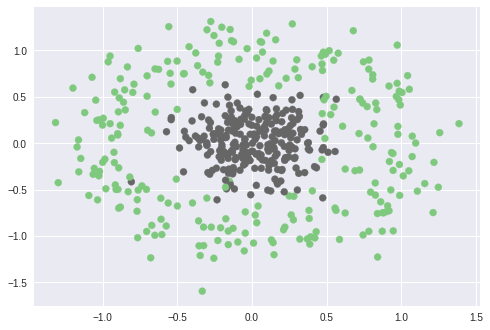

In [59]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)

In [60]:
input_size = 3 #features
layers = [4,3] #no of neurons in 2nd and 3rd layer
out_size = 2

In [61]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [62]:
class NeuralNw():
    def __init__(self,input_size,layers,out_size):
        np.random.seed(0)
        model = {}
#         First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
#         Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
#         Third layer
        model['W3'] = np.random.randn(layers[1],out_size)
        model['b3'] = np.zeros((1,out_size))
        self.model = model
    def feed_forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        self.activations = (a1,a2,y_)
        return y_
    def backprop(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        
        a1,a2,y_ = self.activations
        
        m = x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1= np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        yout = self.feed_forward(x)
        return np.argmax(yout,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activations
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("A3",a3.shape)

In [63]:
model = NeuralNw(input_size=2,layers=[4,3],out_size=2)

In [64]:
# model.feed_forward(X)

In [65]:
def train(X,y,model,epochs,learning_rate,logs=True):
    training_loss = []
    classes=2
    yoht = one_hot(y,classes)
    for ix in range(epochs):
        y_ = model.feed_forward(X)
        l = loss(yoht,y_)
        training_loss.append(l)
        model.backprop(X,yoht,learning_rate)
        if(logs):
            print("epochs %d loss %.4f"%(ix,l))
    return training_loss     

In [66]:
loss = train(X,y,model,500,0.001)

epochs 0 loss 0.7560
epochs 1 loss 0.4708
epochs 2 loss 0.3681
epochs 3 loss 0.3493
epochs 4 loss 0.3488
epochs 5 loss 0.3486
epochs 6 loss 0.3485
epochs 7 loss 0.3484
epochs 8 loss 0.3484
epochs 9 loss 0.3484
epochs 10 loss 0.3486
epochs 11 loss 0.3488
epochs 12 loss 0.3492
epochs 13 loss 0.3496
epochs 14 loss 0.3504
epochs 15 loss 0.3513
epochs 16 loss 0.3526
epochs 17 loss 0.3539
epochs 18 loss 0.3555
epochs 19 loss 0.3568
epochs 20 loss 0.3582
epochs 21 loss 0.3588
epochs 22 loss 0.3593
epochs 23 loss 0.3588
epochs 24 loss 0.3583
epochs 25 loss 0.3571
epochs 26 loss 0.3561
epochs 27 loss 0.3547
epochs 28 loss 0.3537
epochs 29 loss 0.3524
epochs 30 loss 0.3515
epochs 31 loss 0.3505
epochs 32 loss 0.3498
epochs 33 loss 0.3491
epochs 34 loss 0.3486
epochs 35 loss 0.3481
epochs 36 loss 0.3477
epochs 37 loss 0.3473
epochs 38 loss 0.3470
epochs 39 loss 0.3467
epochs 40 loss 0.3465
epochs 41 loss 0.3463
epochs 42 loss 0.3461
epochs 43 loss 0.3459
epochs 44 loss 0.3458
epochs 45 loss 0.345

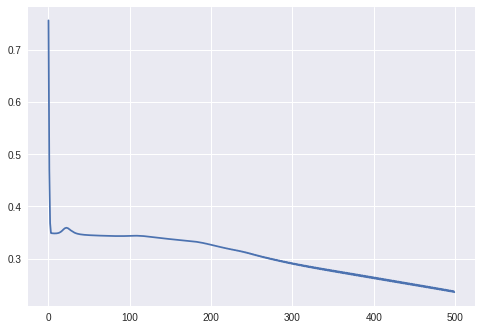

In [67]:
plt.plot(loss)

In [68]:
from visualize import plot_decision_boundary

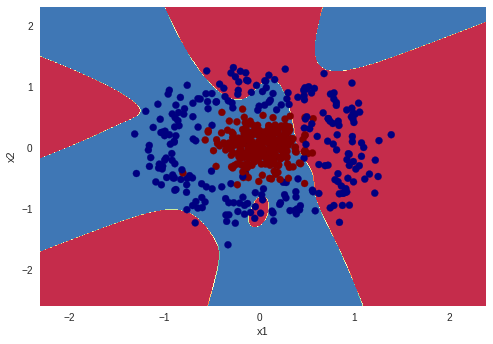

In [69]:
plot_decision_boundary(lambda x : model.predict(x),X,y)

In [70]:
outputs = model.predict(X)

In [71]:
np.sum(outputs==y)/float(y.shape[0])

0.708

# XOR DATASETS